# SALES PREDICTION USING PYTHON

###### Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product. Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So, let's see the task of sales prediction with machine learning using python.

#### Importing necessary libraries

In [204]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sea

#### Upload Dataset

In [205]:
dataset = pd.read_csv('Advertising.csv',index_col=0) 
#index_col=0 , This is to allow you to set which columns to be used as the index of the dataframe.
dataset.index.name = "S.no" #giving name to the index 0
print("Dataset Uploaded successfully")

Dataset Uploaded successfully


#### Display dataset

In [296]:
print('\033[1m' + 'Dataset for Sales in Advertising:'+ '\033[0m') #for bold text
dataset

Dataset for Sales in Advertising:


,TV,Radio,Newspaper,Sales
S.no,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8


#### Random Rows of dataset

In [207]:
print("Random Rows: \n")
dataset.sample(5)

Random Rows: 



,TV,Radio,Newspaper,Sales
S.no,,,,
72,109.8,14.3,31.7,12.4
24,228.3,16.9,26.2,15.5
108,90.4,0.3,23.2,8.7
172,164.5,20.9,47.4,14.5
135,36.9,38.6,65.6,10.8


#### Dimensions of dataset

In [208]:
#Total rows and columns in dataset
dataset.shape

(200, 4)

#### Columns of dataset

In [209]:
print("Names of columns in advertising sales prediction dataset are: \n\n",dataset.columns)

Names of columns in advertising sales prediction dataset are: 

 Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


#### Information of dataset

In [295]:
print('\033[1m' + 'Information of dataset:' + '\033[0m\n\n')
dataset.info()

Information of dataset:


<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


#### Size of dataset

In [211]:
#The size property returns the number of elements in the DataFrame. 
#The number of elements is the number of rows * the number of columns.
print("Size of dataset is: ",dataset.size)

Size of dataset is:  800


#### Correlation of dataframe

In [212]:
#corr() is used to find the pairwise correlation of all columns in the Pandas Dataframe in Python. 
#Any NaN values are automatically excluded.Any non-numeric data type or columns in the Dataframe, it is ignored.0
dc = dataset.corr()
print("Correlation :\n")
dc

Correlation :



,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


#### Statistics summary

In [213]:
#Calculate important features of sales
print("Statistics summary: \n")
dataset.describe()

Statistics summary: 



,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## HEAT MAP

##### METHOD USED - Generating correlation matrix using Seaborn library

[Text(0.5, 1.0, 'Heatmap of Correlated values')]

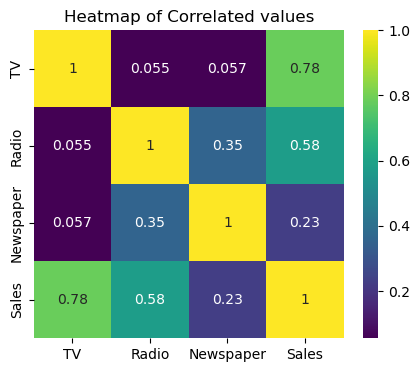

In [299]:
#A heatmap is a matrix kind of 2-dimensional figure which gives a visualisation of numerical data in the form of cells. 
#Each cell of the heatmap is coloured and the shades of colour represent some kind of relationship of the value with 
#the dataframe.

#The correlation matrix can also be generated using Seaborn library. The cells of the generated heatmap will 
#contain the correlation coefficients but the values are round off unlike heatmap generated by Pandas library.

#here "dc" is referred as Correlation in dataset (defined above)

# Defining figure size for the output plot 
fig, ax = plt.subplots(figsize = (5, 4))
#heatmap plot :  to help us spot the strongest and weaker correlations based on warmer (reds) and cooler (blues) tones
#Use annot to represent the cell values with text
sea.heatmap(dc, annot=True, cmap="viridis").set(title='Heatmap of Correlated values')

#### Datatype in dataframe

In [215]:
#Calling the dtypes attribute of a dataframe will return information about the data types of the individual variables 
#within the dataframe.
dataset.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

#### Check duplicacy in dataframe

In [216]:
dataset.duplicated().value_counts()

False    200
dtype: int64

#### Check Null Data in dataframe

In [217]:
dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## GRAPHICAL REPRESENTATION

#### 1 - TV advertisement

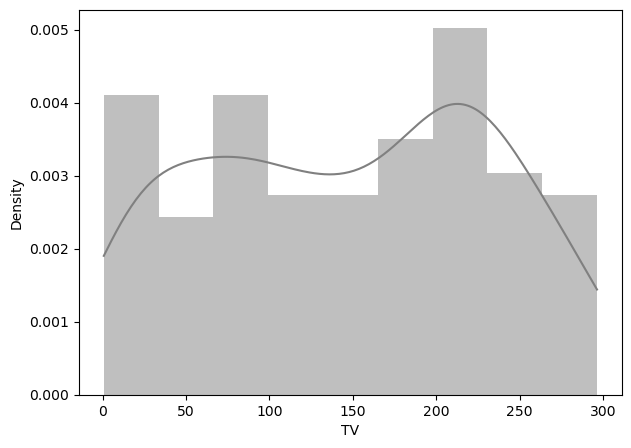

In [218]:
plt.figure(figsize=(7,5))
sea.histplot(dataset['TV'], color="grey", label="100% Equities", kde=True, stat="density", linewidth=0)
plt.show()

#### 2 - Radio advertisement

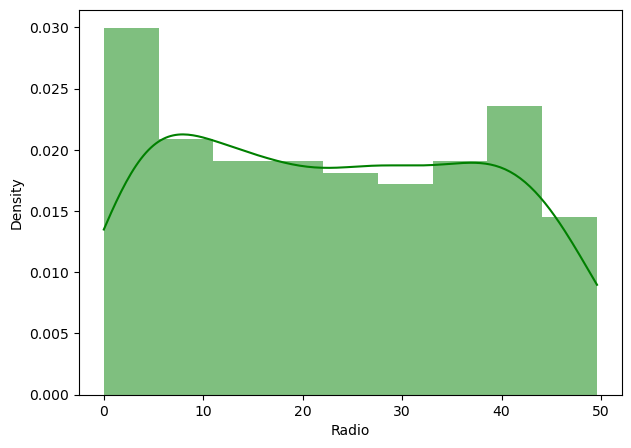

In [219]:
plt.figure(figsize=(7,5))
sea.histplot(dataset['Radio'], color="green", label="100% Equities", kde=True, stat="density", linewidth=0)
plt.show()

#### 3 - Newspaper advertisement

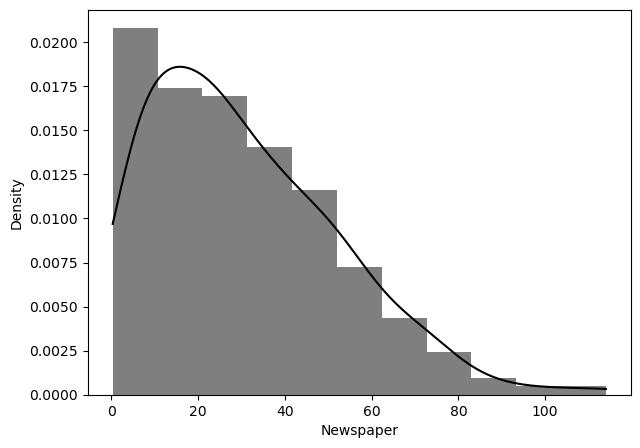

In [220]:
plt.figure(figsize=(7,5))
sea.histplot(dataset['Newspaper'], color="black", label="100% Equities", kde=True, stat="density", linewidth=0)
plt.show()

## Overall Sales graph

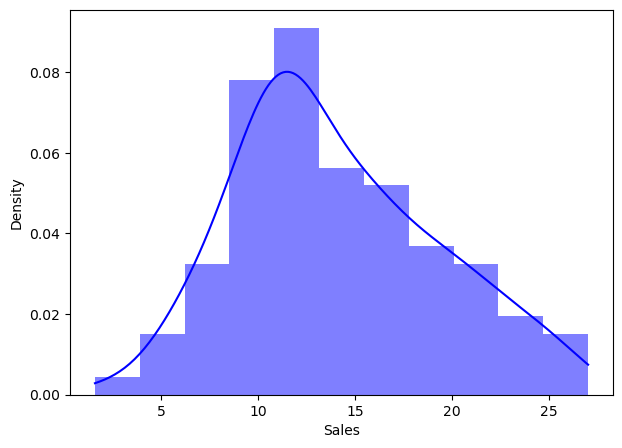

In [221]:
plt.figure(figsize=(7,5))
sea.histplot(dataset['Sales'], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
plt.show()

## PAIRPLOT GRAPHICAL REPRESENTATION

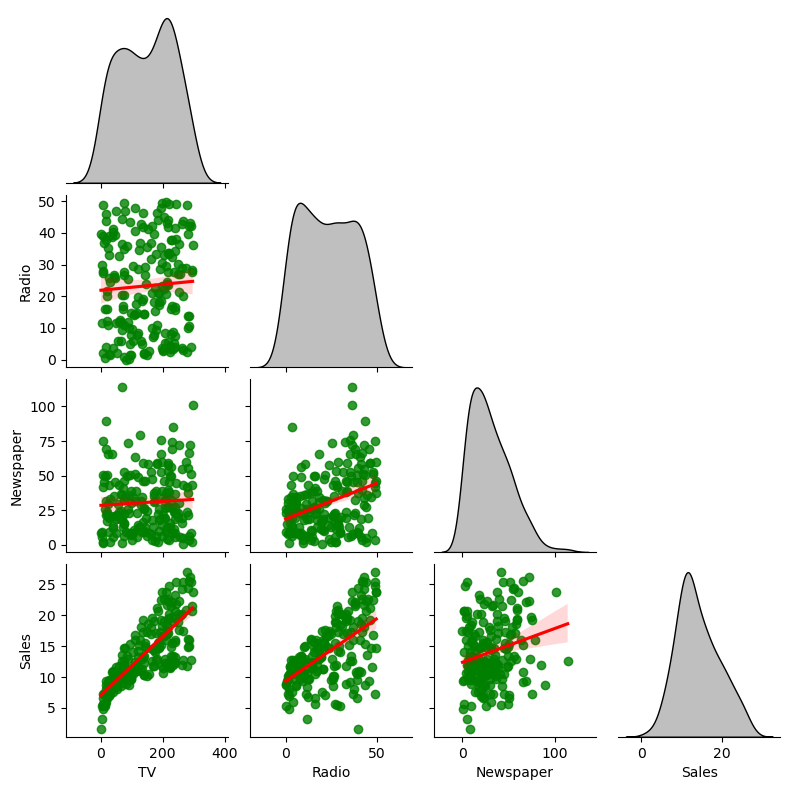

In [278]:
#To plot multiple pairwise bivariate distributions in a dataset, you can use the .pairplot() function. 
#kernel density estimate (KDE) changes the graph from histogram
#plot_kws dictionary is used to make the regression line (kind='reg') more highlighted

sea.pairplot(dataset,corner=True,diag_kind='kde',kind='reg',height=2,plot_kws={'color':'green','line_kws':{'color':'red'}},diag_kws={'color':'black'});

## DATA MODELLING

#### Make x as array having values of all dataset columns except the 'Sales' column

In [222]:
x =np.array(dataset.drop(labels=['Sales'], axis=1))

#### Make y as array having values of 'Sales' column

In [223]:
y =np.array(dataset['Sales'])

### Splitting Datasets With the Sklearn train_test_split Function : training and testing

The train_test_split function is for splitting a single dataset for two different purposes: training and testing. The training subset is for building your model. The testing subset is for using the model on unknown data to evaluate the performance of the model.

In [240]:
#x_train: The training part of the first sequence (x)
#x_test: The test part of the first sequence (x)
#y_train: The training part of the second sequence (y)
#y_test: The test part of the second sequence (y)
#The test_size is the percentage of the overall data we'll be using for testing
    
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size=0.2 ,random_state = 45)
print("Shape of x_train", x_train.shape)
print("Shape of y_train", y_train.shape)

Shape of x_train (160, 3)
Shape of y_train (160,)


### Multiple Linear Regression With scikit-learn

In [241]:
reg= LinearRegression()

###### Statisticians say that a regression model fits the data well if the differences between the observations and the predicted values are small and unbiased. Unbiased in this context means that the fitted values are not systematically too high or too low anywhere in the observation space.

In [242]:
#Use training set to fit the model
reg.fit(x_train, y_train)

LinearRegression()

###### If no errors are thrown - the regressor found the best fitting line! , With linear regression, fitting the model means determining the best intercept (model.intercept_) and slope (model.coef_) values of the regression line.

In [243]:
#COEFFICIENT
coefficient = reg.coef_
coefficient

array([ 0.04699362,  0.18346139, -0.00486456])

In [244]:
#INTERCEPT
intercept = reg.intercept_
intercept

2.985642042751584

## Test the model

##### Making Predictions

In [247]:
#The pred variable now contains all the predicted values for the input values in the X_test
pred = reg.predict(x_test)


#Show the prediction of sales and the test part of sales 
compare= pd.DataFrame({"Actual_sales":list(y_test),"predicted_sales":list(pred)})
compare.head(15)

,Actual_sales,predicted_sales
0,14.9,15.188873
1,8.8,10.205411
2,16.6,16.439320
3,23.8,21.808189
4,12.0,15.887521
5,9.7,8.926802
6,19.0,18.135673
7,11.8,11.365894
8,18.5,17.397555
9,8.5,8.669504


## PREDICTED SALES GRAPH

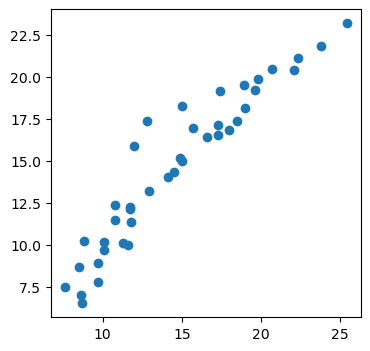

In [256]:
plt.figure(figsize=(4,4))
plt.scatter(y_test, pred)

## Evaluating the Model

#### Mean Absolute Error (MAE)

In [257]:
#When we subtract the predicted values from the actual values, obtaining the errors, sum the absolute values 
#of those errors and get their mean. This metric gives a notion of the overall error for each prediction of the model, 
#the smaller (closer to 0) the better.

mae = mean_absolute_error(y_test, pred)
print(f'Mean absolute error: {mae:.2f}')

Mean absolute error: 1.08


#### Mean Squared Error (MSE)

In [258]:
mse = mean_squared_error(y_test, pred)
print(f'Mean squared error: {mse:.2f}')

Mean squared error: 2.26


#### Root Mean Squared Error (RMSE)

In [267]:
rmse = np.sqrt(mse)
print(f'Root mean squared error: {rmse:.2f}')

Root mean squared error: 1.50
